## Case Study: Car Price Prediction
#### Multiple Linear Regression Case Study

In [1]:
# import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
# load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

In [6]:
# Display all the columns
pd.set_option('display.max_columns', 50)

# Display the first five rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Data Wrangling

In [14]:
#shape of the dataset
df.shape

(205, 26)

In [7]:
# Checking the datatypes
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
# checking for missing values
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
#checking for duplicates
df.duplicated().sum()

0

In [9]:
# descriptive statistics
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Exploration

In [10]:
# importing the module
import seaborn as sns

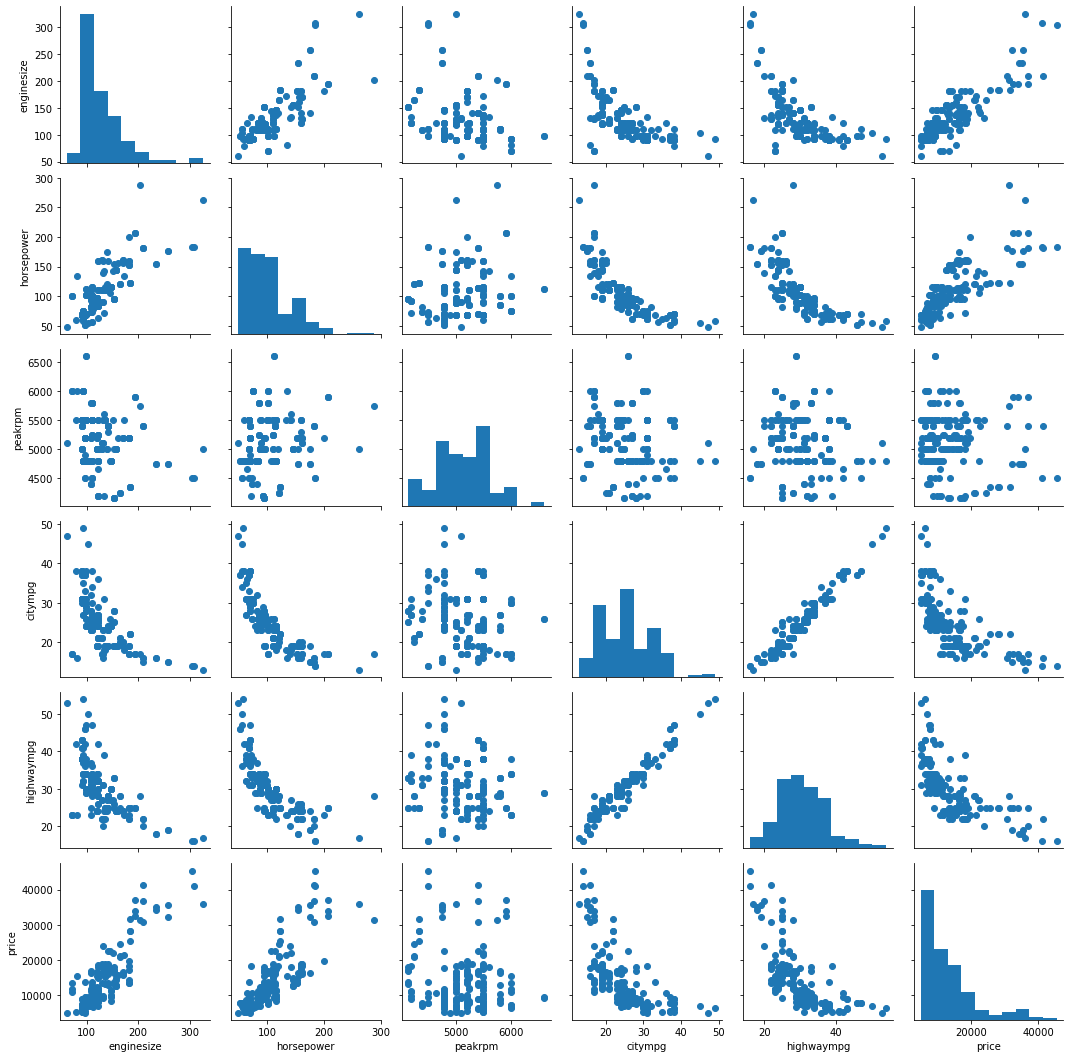

In [11]:
# plotting a pairgrid scatter plot of the features

# selecting the features
var = ['enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

g = sns.PairGrid(data = df, vars=var)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)
plt.show()

- There is positive correlation between price and enginesize, horsepower
- There is negative correlation between price and citympg, highwaympg
- There is no correlation between price and peakrpm

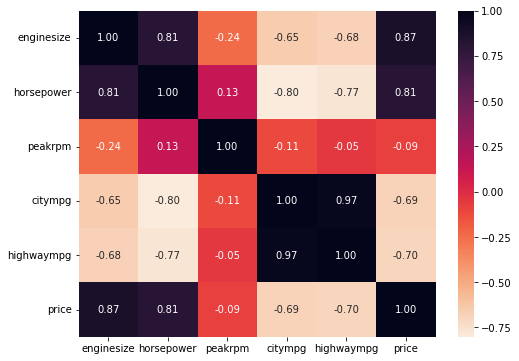

In [13]:
# plottinga heatmap correlation 
plt.figure(figsize=[8,6])
sns.heatmap(df[var].corr(), cmap='rocket_r', annot=True, fmt='.2f');

### Multiple Linear Regression

- Preparing the dataset

In [17]:
# Selecting the input features
X = df[['enginesize', 'horsepower', 'citympg', 'highwaympg']]
X.head()

,enginesize,horsepower,citympg,highwaympg
0,130,111,21,27
1,130,111,21,27
2,152,154,19,26
3,109,102,24,30
4,136,115,18,22


In [18]:
# Selecting the output feature
y = df['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

#### Spliting the Dataset for Training and Testing

In [21]:
# import the module
from sklearn.model_selection import train_test_split

In [22]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
#build the model
model = LinearRegression()

In [25]:
#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [27]:
#check accuracy of model
model.score(X_test, y_test)

0.8352928868152147

### Making new predictions

In [30]:
#creating a arbitrary values of the features for prediction
data = {'enginesize': [135, 140, 134],
           'horsepower': [120, 130, 125],
           'citympg': [23, 30, 27],
           'highwaympg': [31, 40, 35]}

In [33]:
# creating a dataframe
new_data = pd.DataFrame(data)

In [34]:
#displaying the dataframe
new_data

,enginesize,horsepower,citympg,highwaympg
0,135,120,23,31
1,140,130,30,40
2,134,125,27,35


In [35]:
#making prediction
model.predict(new_data)

array([14879.34226802, 14884.07595178, 14553.58253403])